In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

In [14]:
data1 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/2021/kmeans/class_0.csv")
data1

,FID,0cc21,13cc21,25cc21,35cc21,41cc21,49cc21,55cc21,62cc21,69cc21,...,77eg21,84eg21,91eg21,97eg21,106eg21,111eg21,116eg21,124eg21,yield,labels
0,0,0.000000,0.136629,9.152873,16.199360,20.046592,33.231818,45.998476,55.128236,68.567596,...,0.231048,0.229425,0.249003,0.250504,0.254987,0.258325,0.225403,0.015692,35.43,0
1,4,0.000000,0.031860,7.765280,19.174516,22.808490,40.704700,55.493370,67.620692,82.638622,...,0.270348,0.283422,0.268540,0.279359,0.281398,0.283210,0.243489,0.011877,52.14,0
2,5,0.001838,0.012866,3.451901,12.350556,17.101502,31.553787,45.401540,55.144311,70.400929,...,0.229268,0.251223,0.252246,0.254648,0.278343,0.271132,0.255688,0.016919,51.66,0
3,6,0.006723,0.191158,8.688310,16.784636,20.450630,34.953530,49.222375,58.561778,72.809633,...,0.232298,0.246010,0.242638,0.247531,0.258678,0.245336,0.224079,0.012465,42.53,0
4,8,0.000000,0.207700,11.076274,18.989788,25.123761,39.054575,55.964640,63.877234,76.195453,...,0.231318,0.260080,0.264701,0.264734,0.258526,0.246397,0.202390,0.002983,47.53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,3705,0.000000,0.129889,8.806584,13.610655,18.970889,39.472567,53.710715,72.083140,83.693949,...,0.227558,0.216102,0.230650,0.219658,0.200354,0.186531,0.173608,0.012098,40.44,0
483,3706,0.000000,0.022669,10.367315,16.439567,22.417314,44.832440,58.916392,76.759896,87.340790,...,0.230622,0.219472,0.228554,0.219379,0.209483,0.198113,0.176601,0.008897,33.34,0
484,3707,0.000000,0.118861,9.783874,15.532998,21.860366,44.375622,59.525682,77.081493,88.771834,...,0.227993,0.215374,0.236833,0.220556,0.208613,0.197196,0.181531,0.006318,38.74,0
485,3711,0.001225,0.151333,8.208505,11.729310,16.774882,34.340799,48.385307,57.586825,75.333638,...,0.203667,0.200159,0.214611,0.207581,0.201221,0.202948,0.187785,0.019190,36.87,0


In [15]:
data1 = data1.drop('labels',axis=1)
data1

,FID,0cc21,13cc21,25cc21,35cc21,41cc21,49cc21,55cc21,62cc21,69cc21,...,69eg21,77eg21,84eg21,91eg21,97eg21,106eg21,111eg21,116eg21,124eg21,yield
0,0,0.000000,0.136629,9.152873,16.199360,20.046592,33.231818,45.998476,55.128236,68.567596,...,0.248920,0.231048,0.229425,0.249003,0.250504,0.254987,0.258325,0.225403,0.015692,35.43
1,4,0.000000,0.031860,7.765280,19.174516,22.808490,40.704700,55.493370,67.620692,82.638622,...,0.279233,0.270348,0.283422,0.268540,0.279359,0.281398,0.283210,0.243489,0.011877,52.14
2,5,0.001838,0.012866,3.451901,12.350556,17.101502,31.553787,45.401540,55.144311,70.400929,...,0.234782,0.229268,0.251223,0.252246,0.254648,0.278343,0.271132,0.255688,0.016919,51.66
3,6,0.006723,0.191158,8.688310,16.784636,20.450630,34.953530,49.222375,58.561778,72.809633,...,0.254025,0.232298,0.246010,0.242638,0.247531,0.258678,0.245336,0.224079,0.012465,42.53
4,8,0.000000,0.207700,11.076274,18.989788,25.123761,39.054575,55.964640,63.877234,76.195453,...,0.250085,0.231318,0.260080,0.264701,0.264734,0.258526,0.246397,0.202390,0.002983,47.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,3705,0.000000,0.129889,8.806584,13.610655,18.970889,39.472567,53.710715,72.083140,83.693949,...,0.239385,0.227558,0.216102,0.230650,0.219658,0.200354,0.186531,0.173608,0.012098,40.44
483,3706,0.000000,0.022669,10.367315,16.439567,22.417314,44.832440,58.916392,76.759896,87.340790,...,0.241598,0.230622,0.219472,0.228554,0.219379,0.209483,0.198113,0.176601,0.008897,33.34
484,3707,0.000000,0.118861,9.783874,15.532998,21.860366,44.375622,59.525682,77.081493,88.771834,...,0.238856,0.227993,0.215374,0.236833,0.220556,0.208613,0.197196,0.181531,0.006318,38.74
485,3711,0.001225,0.151333,8.208505,11.729310,16.774882,34.340799,48.385307,57.586825,75.333638,...,0.216413,0.203667,0.200159,0.214611,0.207581,0.201221,0.202948,0.187785,0.019190,36.87


In [16]:
data1 = data1.T

In [17]:
data1 = data1.iloc[1:,:]
data1

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
0cc21,0.000000,0.000000,0.001838,0.006723,0.000000,0.000000,0.000613,0.000000,0.005514,0.015930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001225,0.002451
13cc21,0.136629,0.031860,0.012866,0.191158,0.207700,0.113959,0.122537,0.183806,0.015930,0.004901,...,0.008578,0.170939,0.034310,0.051466,0.082100,0.129889,0.022669,0.118861,0.151333,0.432556
25cc21,9.152873,7.765280,3.451901,8.688310,11.076274,8.827313,10.793302,8.052805,3.623228,3.454957,...,6.548392,8.965706,7.778692,6.938027,8.512117,8.806584,10.367315,9.783874,8.208505,6.636184
35cc21,16.199360,19.174516,12.350556,16.784636,18.989788,16.884621,19.768290,15.105624,10.751079,11.295229,...,12.886450,14.617284,13.705838,11.950617,13.401447,13.610655,16.439567,15.532998,11.729310,10.525225
41cc21,20.046592,22.808490,17.101502,20.450630,25.123761,23.306802,24.260780,19.866813,15.531801,15.885993,...,20.102779,21.263760,19.260479,17.683280,18.950921,18.970889,22.417314,21.860366,16.774882,16.153025
49cc21,33.231818,40.704700,31.553787,34.953530,39.054575,37.681089,37.546676,32.884200,31.227402,29.108326,...,40.306122,42.749763,38.871363,35.592653,39.600573,39.472567,44.832440,44.375622,34.340799,35.466767
55cc21,45.998476,55.493370,45.401540,49.222375,55.964640,54.689525,53.657255,44.028236,43.172077,42.269753,...,57.669867,58.088253,53.436366,48.230656,54.050907,53.710715,58.916392,59.525682,48.385307,51.015157
62cc21,55.128236,67.620692,55.144311,58.561778,63.877234,63.335124,60.814735,54.385084,54.335372,53.996563,...,69.064105,76.632518,71.737228,64.509628,71.713080,72.083140,76.759896,77.081493,57.586825,64.464621
69cc21,68.567596,82.638622,70.400929,72.809633,76.195453,75.875629,74.025301,65.355091,66.870904,69.085075,...,89.318092,89.045572,86.084831,76.229843,83.667124,83.693949,87.340790,88.771834,75.333638,85.186405
77cc21,81.813491,96.438592,87.133566,85.618920,87.519484,87.422736,85.884440,86.357431,86.727224,86.037087,...,96.670787,96.717012,97.461973,84.999731,90.597151,89.538296,93.837141,94.635851,83.205590,95.716205


In [18]:
data1['average'] = data1.iloc[:,:].mean(axis=1)

In [19]:
data1

,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,average
0cc21,0.000000,0.000000,0.001838,0.006723,0.000000,0.000000,0.000613,0.000000,0.005514,0.015930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001225,0.002451,0.001268
13cc21,0.136629,0.031860,0.012866,0.191158,0.207700,0.113959,0.122537,0.183806,0.015930,0.004901,...,0.170939,0.034310,0.051466,0.082100,0.129889,0.022669,0.118861,0.151333,0.432556,0.094978
25cc21,9.152873,7.765280,3.451901,8.688310,11.076274,8.827313,10.793302,8.052805,3.623228,3.454957,...,8.965706,7.778692,6.938027,8.512117,8.806584,10.367315,9.783874,8.208505,6.636184,6.638861
35cc21,16.199360,19.174516,12.350556,16.784636,18.989788,16.884621,19.768290,15.105624,10.751079,11.295229,...,14.617284,13.705838,11.950617,13.401447,13.610655,16.439567,15.532998,11.729310,10.525225,11.931474
41cc21,20.046592,22.808490,17.101502,20.450630,25.123761,23.306802,24.260780,19.866813,15.531801,15.885993,...,21.263760,19.260479,17.683280,18.950921,18.970889,22.417314,21.860366,16.774882,16.153025,19.879097
49cc21,33.231818,40.704700,31.553787,34.953530,39.054575,37.681089,37.546676,32.884200,31.227402,29.108326,...,42.749763,38.871363,35.592653,39.600573,39.472567,44.832440,44.375622,34.340799,35.466767,38.543678
55cc21,45.998476,55.493370,45.401540,49.222375,55.964640,54.689525,53.657255,44.028236,43.172077,42.269753,...,58.088253,53.436366,48.230656,54.050907,53.710715,58.916392,59.525682,48.385307,51.015157,55.132859
62cc21,55.128236,67.620692,55.144311,58.561778,63.877234,63.335124,60.814735,54.385084,54.335372,53.996563,...,76.632518,71.737228,64.509628,71.713080,72.083140,76.759896,77.081493,57.586825,64.464621,69.883922
69cc21,68.567596,82.638622,70.400929,72.809633,76.195453,75.875629,74.025301,65.355091,66.870904,69.085075,...,89.045572,86.084831,76.229843,83.667124,83.693949,87.340790,88.771834,75.333638,85.186405,85.915037
77cc21,81.813491,96.438592,87.133566,85.618920,87.519484,87.422736,85.884440,86.357431,86.727224,86.037087,...,96.717012,97.461973,84.999731,90.597151,89.538296,93.837141,94.635851,83.205590,95.716205,94.548044


In [20]:
data1 = data1[34:51]

In [21]:
data1

,0,1,2,3,4,5,6,7,8,9,...,478,479,480,481,482,483,484,485,486,average
0eg21,-0.011779,-0.010406,-0.010546,-0.013262,-0.019996,-0.016664,-0.020854,-0.004991,-0.005881,-0.012843,...,-0.007749,-0.011411,-0.012580,-0.011422,-0.006622,-0.010574,-0.010690,-0.011630,-0.008472,-0.011012
13eg21,0.001820,-0.000623,-0.006551,-0.002216,0.002379,-0.001669,0.001487,-0.003067,-0.009224,-0.006136,...,0.004579,-0.000088,0.000343,0.001635,0.005619,0.006463,0.003680,0.003082,0.002586,-0.002829
25eg21,0.015754,0.021355,0.011943,0.017517,0.018362,0.013400,0.021736,0.013922,0.010365,0.009731,...,0.014312,0.013910,0.010173,0.011409,0.013220,0.016086,0.015448,0.008852,0.009037,0.009180
35eg21,0.039046,0.042490,0.030366,0.037215,0.048634,0.043570,0.046553,0.034948,0.024063,0.026712,...,0.037300,0.033780,0.031230,0.033429,0.033014,0.039527,0.039053,0.031921,0.026744,0.038004
41eg21,0.070544,0.081188,0.053170,0.074570,0.091553,0.083735,0.088198,0.075927,0.064005,0.044747,...,0.078188,0.069495,0.063046,0.075497,0.075078,0.084802,0.084026,0.062207,0.055887,0.079882
49eg21,0.130895,0.152005,0.117762,0.139991,0.159505,0.150807,0.150832,0.127135,0.115843,0.104303,...,0.141427,0.130716,0.115366,0.133191,0.136952,0.151976,0.153960,0.120794,0.120241,0.147199
55eg21,0.156631,0.200541,0.153942,0.181636,0.195800,0.194024,0.182801,0.166700,0.161374,0.138382,...,0.157241,0.145408,0.129611,0.150872,0.156165,0.168537,0.171335,0.133395,0.140277,0.183208
62eg21,0.227834,0.278912,0.232899,0.262193,0.266093,0.269173,0.257051,0.226508,0.233819,0.215743,...,0.253824,0.239207,0.208699,0.237521,0.243278,0.250889,0.258171,0.213282,0.230963,0.273185
69eg21,0.248920,0.279233,0.234782,0.254025,0.250085,0.248199,0.245954,0.244887,0.265342,0.240731,...,0.271082,0.250854,0.219534,0.248117,0.239385,0.241598,0.238856,0.216413,0.242221,0.282310
77eg21,0.231048,0.270348,0.229268,0.232298,0.231318,0.230835,0.218874,0.226732,0.240436,0.235323,...,0.236652,0.230563,0.214697,0.231417,0.227558,0.230622,0.227993,0.203667,0.240007,0.260788


In [22]:
data1['average_eg'] = data1['average']

C:\Users\samba\.conda\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data1

,0,1,2,3,4,5,6,7,8,9,...,479,480,481,482,483,484,485,486,average,average_eg
0eg21,-0.011779,-0.010406,-0.010546,-0.013262,-0.019996,-0.016664,-0.020854,-0.004991,-0.005881,-0.012843,...,-0.011411,-0.012580,-0.011422,-0.006622,-0.010574,-0.010690,-0.011630,-0.008472,-0.011012,-0.011012
13eg21,0.001820,-0.000623,-0.006551,-0.002216,0.002379,-0.001669,0.001487,-0.003067,-0.009224,-0.006136,...,-0.000088,0.000343,0.001635,0.005619,0.006463,0.003680,0.003082,0.002586,-0.002829,-0.002829
25eg21,0.015754,0.021355,0.011943,0.017517,0.018362,0.013400,0.021736,0.013922,0.010365,0.009731,...,0.013910,0.010173,0.011409,0.013220,0.016086,0.015448,0.008852,0.009037,0.009180,0.009180
35eg21,0.039046,0.042490,0.030366,0.037215,0.048634,0.043570,0.046553,0.034948,0.024063,0.026712,...,0.033780,0.031230,0.033429,0.033014,0.039527,0.039053,0.031921,0.026744,0.038004,0.038004
41eg21,0.070544,0.081188,0.053170,0.074570,0.091553,0.083735,0.088198,0.075927,0.064005,0.044747,...,0.069495,0.063046,0.075497,0.075078,0.084802,0.084026,0.062207,0.055887,0.079882,0.079882
49eg21,0.130895,0.152005,0.117762,0.139991,0.159505,0.150807,0.150832,0.127135,0.115843,0.104303,...,0.130716,0.115366,0.133191,0.136952,0.151976,0.153960,0.120794,0.120241,0.147199,0.147199
55eg21,0.156631,0.200541,0.153942,0.181636,0.195800,0.194024,0.182801,0.166700,0.161374,0.138382,...,0.145408,0.129611,0.150872,0.156165,0.168537,0.171335,0.133395,0.140277,0.183208,0.183208
62eg21,0.227834,0.278912,0.232899,0.262193,0.266093,0.269173,0.257051,0.226508,0.233819,0.215743,...,0.239207,0.208699,0.237521,0.243278,0.250889,0.258171,0.213282,0.230963,0.273185,0.273185
69eg21,0.248920,0.279233,0.234782,0.254025,0.250085,0.248199,0.245954,0.244887,0.265342,0.240731,...,0.250854,0.219534,0.248117,0.239385,0.241598,0.238856,0.216413,0.242221,0.282310,0.282310
77eg21,0.231048,0.270348,0.229268,0.232298,0.231318,0.230835,0.218874,0.226732,0.240436,0.235323,...,0.230563,0.214697,0.231417,0.227558,0.230622,0.227993,0.203667,0.240007,0.260788,0.260788


In [24]:
data2 = data1['average_eg']

In [25]:
data2

0eg21     -0.011012
13eg21    -0.002829
25eg21     0.009180
35eg21     0.038004
41eg21     0.079882
49eg21     0.147199
55eg21     0.183208
62eg21     0.273185
69eg21     0.282310
77eg21     0.260788
84eg21     0.262276
91eg21     0.264977
97eg21     0.252285
106eg21    0.246245
111eg21    0.251776
116eg21    0.242103
124eg21    0.015861
Name: average_eg, dtype: float64

In [26]:
data2 = pd.DataFrame(data2)

In [27]:
dataset_train = data2[0:13]
dataset_test = data2[13:16]

In [28]:
training_set = data2.iloc[0:13,:].values
training_set

array([[-0.01101209],
       [-0.00282871],
       [ 0.00917954],
       [ 0.038004  ],
       [ 0.07988199],
       [ 0.14719915],
       [ 0.18320812],
       [ 0.27318497],
       [ 0.28230988],
       [ 0.26078847],
       [ 0.2622761 ],
       [ 0.26497689],
       [ 0.2522845 ]])

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [30]:
X_train = []
y_train = []
for i in range(1, 12):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [94]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [95]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50
2/2 [==============================] - 4s 5ms/step - loss: 0.4906
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4830
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4741
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4659
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4568
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4460
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4369
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4280
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4146
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.4024
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3850
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3697
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 0.

In [96]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 50)             10400     
                                                                 
 dropout_24 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_25 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_26 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_15 (LSTM)              (None, 50)               

In [97]:
real_average_eg = data2.iloc[13:17,:].values

In [98]:
real_average_eg

array([[0.24624542],
       [0.25177629],
       [0.24210349],
       [0.01586055]])

In [99]:
dataset_total = pd.concat((dataset_train['average_eg'], dataset_test['average_eg']), axis = 0)

In [100]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values

In [101]:
inputs = inputs.reshape(-1,1)

In [102]:
inputs = sc.transform(inputs)

In [103]:
X_test = []
for i in range(1, 5):
    X_test.append(inputs[i-1:i, 0])

In [104]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_eg = model.predict(X_test)
predicted_average_eg = sc.inverse_transform(predicted_average_eg)

1/1 [==============================] - 1s 782ms/step


In [105]:
predicted_average_eg

array([[0.24539217],
       [0.24069776],
       [0.24499522],
       [0.23750693]], dtype=float32)

In [106]:
real_average_eg

array([[0.24624542],
       [0.25177629],
       [0.24210349],
       [0.01586055]])

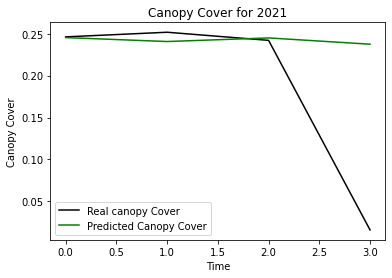

In [107]:
plt.plot(real_average_eg, color = 'black', label = 'Real canopy Cover')
plt.plot(predicted_average_eg, color = 'green', label = 'Predicted Canopy Cover')
plt.title('Canopy Cover for 2021')
plt.xlabel('Time')
plt.ylabel('Canopy Cover')
plt.legend()
plt.show()

In [85]:
#GRU Implementation
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50


C:\Users\samba\.conda\envs\env2\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 4s 15ms/step - loss: 0.4844
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.4163
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3189
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.2109
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1334
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1418
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1662
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1628
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2073
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1927
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1593
Epoch 13/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1371
Epoch

In [86]:
regressorGRU.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 1, 50)             7950      
                                                                 
 dropout_20 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_9 (GRU)                 (None, 1, 50)             15300     
                                                                 
 dropout_21 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_10 (GRU)                (None, 1, 50)             15300     
                                                                 
 dropout_22 (Dropout)        (None, 1, 50)             0         
                                                                 
 gru_11 (GRU)                (None, 50)               

In [87]:
real_average_eg = data2.iloc[13:17,:].values
real_average_eg

array([[0.24624542],
       [0.25177629],
       [0.24210349],
       [0.01586055]])

In [88]:
dataset_total = pd.concat((dataset_train['average_eg'], dataset_test['average_eg']), axis = 0)

In [89]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values

In [90]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [91]:
X_test = []
for i in range(1, 5):
    X_test.append(inputs[i-1:i, 0])

In [92]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_eg = regressorGRU.predict(X_test)
predicted_average_eg = sc.inverse_transform(predicted_average_eg)

1/1 [==============================] - 1s 705ms/step


In [93]:
predicted_average_eg

array([[0.17284924],
       [0.17274901],
       [0.17284082],
       [0.17268021]], dtype=float32)